In [ ]:
import pandas as pd
import matplotlib.pyplot as pp
import statistics as st
import numpy as np
import matplotlib
import seaborn as sns
import sklearn
from sklearn.cross_validation import train_test_split

In [105]:
file = 'Pharma Data.xlsx'
xl = pd.ExcelFile(file)
print(xl.sheet_names)
pharma = xl.parse('calib_012710')

['calib_012710', 'data dictionary', 'Unknown']


In [106]:
# create 2nd dataframe of data consolidated by month
pharma_month = pharma.groupby('Month')
IMSDR_stats = pharma_month["IMSDR"].agg([np.mean, np.std]) # create data frame to use as index
IMSDR_stats.reset_index(level=0, inplace=True) # create index for data frame above
pharma_month_stats = pd.concat([pharma_month["IMSDR"].agg([np.mean, np.std]),pharma_month["nrx"].agg([np.mean, np.std]),pharma_month["details"].agg([np.mean, np.std]),pharma_month["cnrx"].agg([np.mean, np.std]),pharma_month["own_atts"].agg([np.mean, np.std]),pharma_month["comp_atts"].agg([np.mean, np.std]),pharma_month["own_pdet"].agg([np.mean, np.std]), pharma_month["comp_pdet"].agg([np.mean, np.std]),pharma_month["lnrx"].agg([np.mean, np.std]),pharma_month["mon"].agg([np.mean, np.std]),pharma_month["rec"].agg([np.mean, np.std]),pharma_month["freq"].agg([np.mean, np.std]),pharma_month["mspc"].agg([np.mean, np.std])], axis=1, join_axes=[IMSDR_stats.index])
# insert columns names
pharma_month_stats.columns = ["IMSDR Avg.","IMSDR Std.","nrx Avg.","nrx Std.","details Avg.","details Std.","cnrx Avg.","cnrx Std.","own_atts Avg.","own_atts Std.","comp_atts Avg.","comp_atts Std.","own_pdet Avg.","own_pdet Std.","comp_pdet Avg.","comp_pdet Std.","lnrx Avg.","lnrx Std.","mon Avg.","mon Std.","rec Avg.","rec Std.","freq Avg.","freq Std.","mspc Avg.","mspc Std."]
# delete empty first row
pharma_month_stats = pharma_month_stats.iloc[1:]
# below are the stats of the columns code broken out in case we need separate data frames
IMSDR_stats = pharma_month["IMSDR"].agg([np.mean, np.std])
nrx_stats = pharma_month["nrx"].agg([np.mean, np.std])
cnrx_stats = pharma_month["cnrx"].agg([np.mean, np.std])
own_atts_stats = pharma_month["own_atts"].agg([np.mean, np.std])
comp_atts_stats = pharma_month["comp_atts"].agg([np.mean, np.std])
own_pdet_stats = pharma_month["own_pdet"].agg([np.mean, np.std])
comp_pdet_stats = pharma_month["comp_pdet"].agg([np.mean, np.std])
lnrx_stats = pharma_month["lnrx"].agg([np.mean, np.std])
mon_stats = pharma_month["mon"].agg([np.mean, np.std])
rec_stats = pharma_month["rec"].agg([np.mean, np.std])
freq_stats = pharma_month["freq"].agg([np.mean, np.std])
mspc_stats = pharma_month["mspc"].agg([np.mean, np.std])
# create dataframe showing just averages
pharma_month_avg = pd.concat([pharma_month["IMSDR"].agg([np.mean]),pharma_month["nrx"].agg([np.mean]),pharma_month["details"].agg([np.mean]),pharma_month["cnrx"].agg([np.mean]),pharma_month["own_atts"].agg([np.mean]),pharma_month["comp_atts"].agg([np.mean]),pharma_month["own_pdet"].agg([np.mean]), pharma_month["comp_pdet"].agg([np.mean]),pharma_month["lnrx"].agg([np.mean]),pharma_month["mon"].agg([np.mean]),pharma_month["rec"].agg([np.mean]),pharma_month["freq"].agg([np.mean]),pharma_month["mspc"].agg([np.mean])], axis=1, join_axes=[IMSDR_stats.index])
pharma_month_avg.columns = ["IMSDR Avg.","nrx Avg.","details Avg.","cnrx Avg.","own_atts Avg.","comp_atts Avg.","own_pdet Avg.","comp_pdet Avg.","lnrx Avg.","mon Avg.","rec Avg.","freq Avg.","mspc Avg."]
# delete empty first row
pharma_month_avg = pharma_month_avg.iloc[1:]


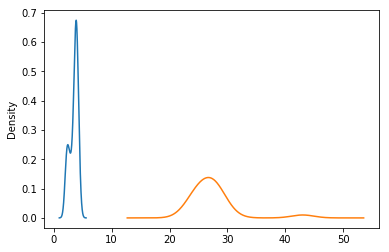

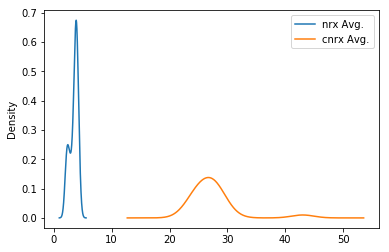

In [107]:
# 1.	Generate probability distributions of prescriptions of both the company’s drug and competitors’ drugs.
# nrx and cnrx variables are # of prescriptions of own drug and competiting drug, respectively
# look at density plots individually
pharma_month_avg['nrx Avg.'].plot.density(bw_method=None, ind=None)
pharma_month_avg['cnrx Avg.'].plot.density(bw_method=None, ind=None)
density = pd.DataFrame({'nrx Avg.': pharma_month_avg['nrx Avg.'],'cnrx Avg.': pharma_month_avg['cnrx Avg.']})
density.plot.kde() # smooth bandwidth roughly equal to 0.4
# the density of the average number of prescriptions of competing drugs is much wider than prescription of own drug
# competing drug prescriptions is normal, whereas own drug prescriptions is bimodal


0.5616011890356394

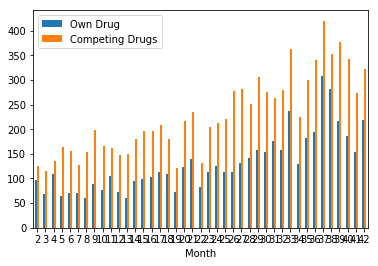

In [108]:
# 2.	Determine how well the sales of the drug stack against competing drug sales.
own_sales_sum = pharma_month["own_pdet"].agg([sum])
own_sales_sum.columns = ["Sales of Own Drug"]
own_sales_sum = own_sales_sum.iloc[1:] # remove empty first row
comp_sales_sum = pharma_month["comp_pdet"].agg([sum])
comp_sales_sum.columns = ["Sales of Competing Drugs"]
comp_sales_sum = comp_sales_sum.iloc[1:] # remove empty first row
sales_sum = pd.DataFrame({'Own Drug': own_sales_sum['Sales of Own Drug'],'Competing Drugs': comp_sales_sum['Sales of Competing Drugs']})
sales_sum.plot.bar(rot=0)
# determine by how much competing drugs sales exceeds sales of own drug
sales_change = (own_sales_sum['Sales of Own Drug']/comp_sales_sum['Sales of Competing Drugs'])
sales_change = sales_change.iloc[1:] # remove empty first row
# make new dataframe showing this new column
sales_sum_all = pd.concat([own_sales_sum,comp_sales_sum,sales_change], axis=1, join_axes=[own_sales_sum.index])
st.mean(sales_change) # on average, there are 57% more sales of competing drugs


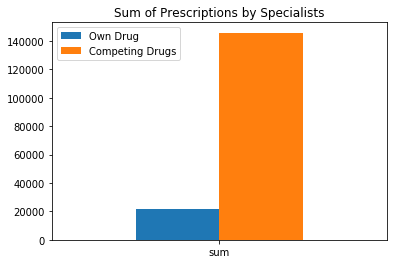

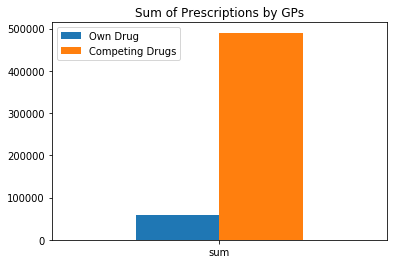

In [109]:
# 3. Determine whether specialists (SPs) or general practitioners (GPs) prescribe the company’s drug more than competing drugs.
prescriber_count = pd.DataFrame(pharma['mspc'].value_counts()) # 1 = specialist, 0 = general practitioner (GP)
# GPs prescribed 11214 more prescriptions than specialists
# determine which physicians prescribed which drugs
pharma_num_prescription = pharma[['nrx', 'cnrx', 'mspc']].copy() # create new dataframe with only these three variables
sp_prescription = pharma_num_prescription.loc[pharma_num_prescription['mspc'] == 1]
gp_prescription = pharma_num_prescription.loc[pharma_num_prescription['mspc'] == 0]
sp_sum = pd.concat([sp_prescription["nrx"].agg([sum]),sp_prescription["cnrx"].agg([sum])], axis=1,ignore_index=False)
sp_sum.columns = ["Own Drug","Competing Drugs"]
gp_sum = pd.concat([gp_prescription["nrx"].agg([sum]),gp_prescription["cnrx"].agg([sum])], axis=1,ignore_index=False)
gp_sum.columns = ["Own Drug","Competing Drugs"]
sp_sum.plot.bar(rot=0,title='Sum of Prescriptions by Specialists')
gp_sum.plot.bar(rot=0,title='Sum of Prescriptions by GPs')
# Prescriptions of competing drugs by both SPs and GPs far exceeds prescriptions of own drug.


NRX Correlations: IMSDR       -0.036147
nrx          1.000000
details      0.271995
cnrx         0.352956
own_atts     0.119840
comp_atts    0.024878
own_pdet     0.108506
comp_pdet    0.070226
lnrx         0.805703
mon          0.844695
rec         -0.321996
freq         0.419663
mspc         0.022628
Name: nrx, dtype: float64
MSPC Correlations: IMSDR       -0.063837
nrx          0.022628
details      0.014418
cnrx        -0.093142
own_atts    -0.046612
comp_atts   -0.072306
own_pdet     0.152251
comp_pdet    0.110920
lnrx         0.022014
mon          0.023294
rec         -0.012268
freq         0.020554
mspc         1.000000
Name: mspc, dtype: float64


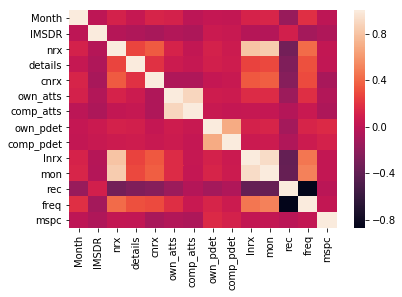

In [110]:
# 4.	Determine which variables are more predictive of whether the target 
#drug is prescribed. Perform PCA to reduce the number of variables and 
#focus on the most predictive ones.

#round all values to nearest integer: 
pharmaint = pharma.round()

#calculate correlations using pandas's .corr() function in the Pearson method, which evaluates continuous variables: 
#print(pharmaint.corr(method='pearson'))

#calculate correlation between nrx and all other fields, except months: 
print("NRX Correlations:", pharmaint[pharmaint.columns[1:]].corr(method='pearson')['nrx'])

#calculate correlation between mspc and all other fields, except months: 
print("MSPC Correlations:", pharmaint[pharmaint.columns[1:]].corr(method='pearson')['mspc'])

%matplotlib inline
#draw heatmap of correlations between values in pharma_month_avg
corr = pharmaint.corr(method='pearson')
sns.heatmap(corr,
    xticklabels=corr.columns,
    yticklabels=corr.columns)

#with the above, we can see that the number of target drugs prescribed is of course best correlated 
#with the log of that value and its monetary value, neither of which can really be predictive. 

#Aside from that, we can see some correlation in the number of details provided/calls made (.272) 
#and number of competitor prescriptions written (.353, this is likely just a matter of patient volume.) 


In [115]:
# 6.	Using linear regression, we will try to execute predictive modeling, splitting the data between a training dataset 
#and a testing dataset, to predict if the prescriber is a SP or GP or the number of new prescriptions of the company’s drug. 
#We will first try to construct a model using Naïve Bayes, with the results represented by a confusion matrix.

pharmaclean = pharmaint.dropna()

from sklearn.cross_validation import train_test_split

train, test = train_test_split(pharmaclean, test_size = 0.4)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)
                        
label_train = train.nrx
features_train = train.iloc[:,3:]

label_test = test.nrx
features_test = test.iloc[:,3:]


from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,label_train)
accuracy_test = accuracy_score(pred_test,label_test)

print('RF train accuracy:',accuracy_train)
print('RF test accuracy:',accuracy_test)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

nb_pred = gnb.fit(features_train, label_train).predict(features_train)
nb_test_pred = gnb.fit(features_test, label_test).predict(features_test)

nb_accuracy = accuracy_score(nb_pred, label_train)
nb_test_accuracy = accuracy_score(nb_test_pred, label_test)
print("NB train accuracy: ", nb_accuracy)
print("NB test accuracy: ", nb_test_accuracy)


from sklearn import metrics
#fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
#auc_train = metrics.auc(fpr,tpr)

#fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
#auc_test = metrics.auc(fpr,tpr)



RF train accuracy: 0.980625
RF test accuracy: 0.25960637300843487
NB train accuracy:  0.229375
NB test accuracy:  0.2380506091846298
